In [34]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [35]:
#reading csv file into dataframe
df=pd.read_csv("Advertising.csv")

In [36]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [37]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [38]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [39]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

NO NULL VALUES

<AxesSubplot:>

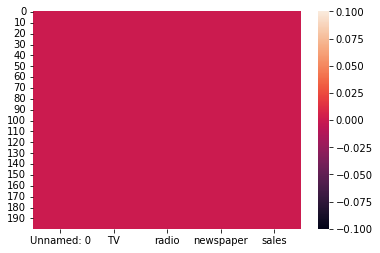

In [40]:
sns.heatmap(df.isnull())

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [53]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [54]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Data Visualization

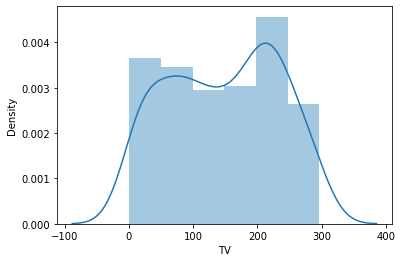

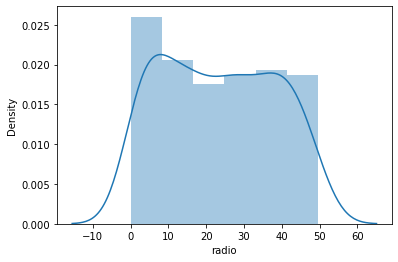

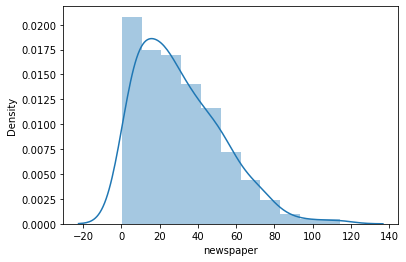

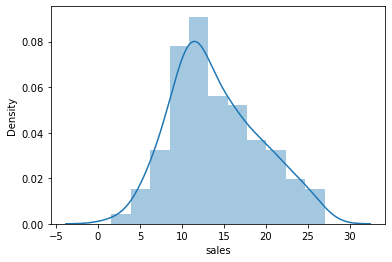

In [55]:
features=['TV','radio','newspaper','sales']
for i in features:
    
    sns.distplot(df[i])
    plt.show()    

HERE WE CAN SEE SALES GRAPH OF TV AND RADIO ARE ALMOST NORMAL WHERE AS NEWSPAPER IS RIGHT SKEWED

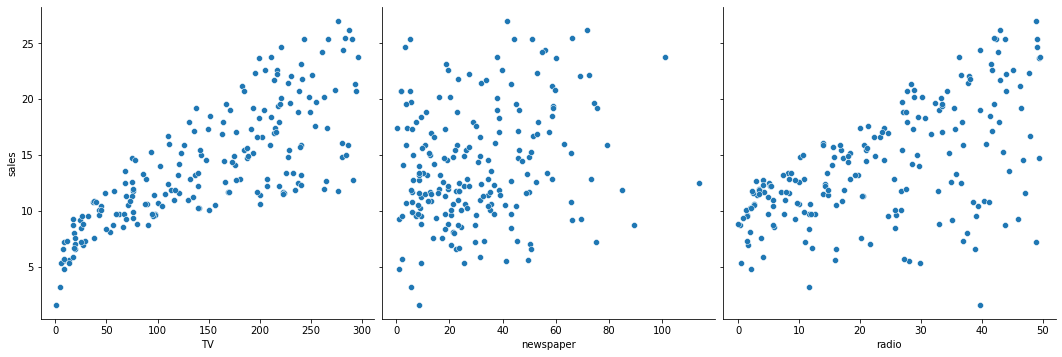

In [122]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter',size=5)
plt.show()

TV AND RADIO SHOWING ALMOST UNIFORM GROWTH 

# CORRELATION

In [56]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

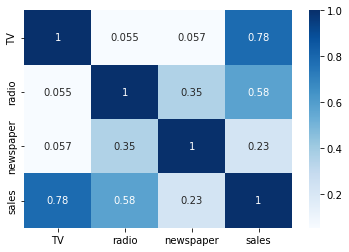

In [57]:
sns.heatmap(df.corr(),cmap='Blues',annot=True,)

HENCE ADVERTISING THROUGH TV IS BEING MOST CORRELATED TO SALES COMPARED TO NEWSPAPER AND RADIO

In [58]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000




# CHECKING OUTLIERS

TV              AxesSubplot(0.125,0.657941;0.227941x0.222059)
radio        AxesSubplot(0.398529,0.657941;0.227941x0.222059)
newspaper    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
sales           AxesSubplot(0.125,0.391471;0.227941x0.222059)
dtype: object

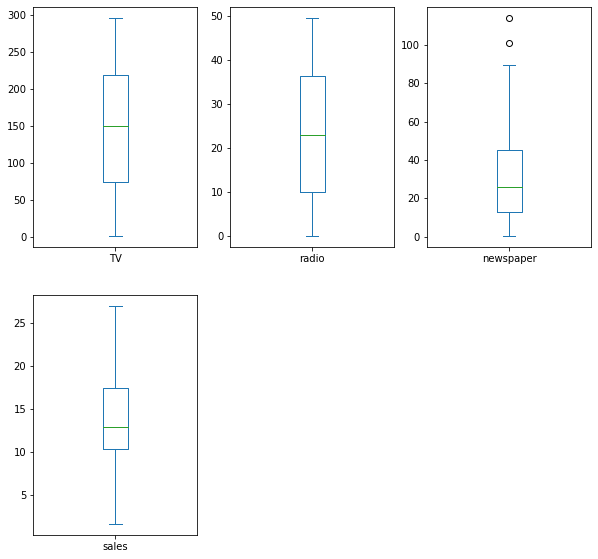

In [69]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,15))

NEWSPAPER HAVING SOME OUTLIERS,




In [81]:
from scipy import stats
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
df1 = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
df1.shape

(198, 4)

TV              AxesSubplot(0.125,0.657941;0.227941x0.222059)
radio        AxesSubplot(0.398529,0.657941;0.227941x0.222059)
newspaper    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
sales           AxesSubplot(0.125,0.391471;0.227941x0.222059)
dtype: object

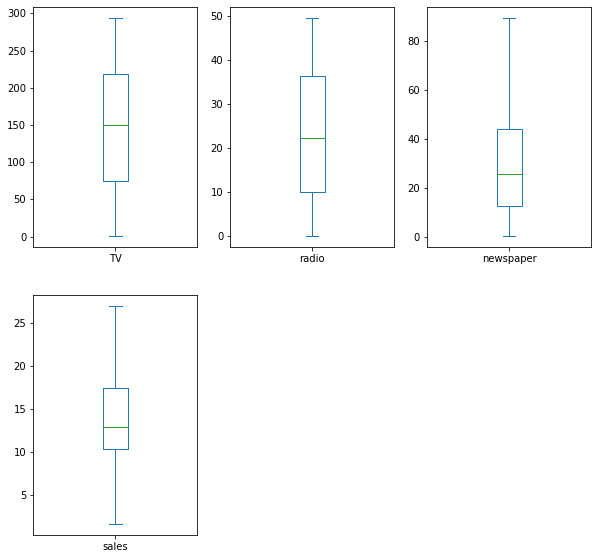

In [82]:
df1.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,15))

OUTLIERS ARE REMOVED ,NOW CAN MOVE FORWARD FOR DATA MODELLING

In [85]:
df1.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [87]:
#independent column
x=df1.iloc[:,:-1]
#target
y=df1.iloc[:,-1]

In [88]:
x.shape

(198, 3)

In [89]:
y.shape

(198,)

# Removing skewness

In [90]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [91]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102



# Splitting the DataFrame

train test split

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [93]:
x_train.shape

(154, 3)

In [94]:
x_test.shape

(44, 3)

In [95]:
y_train.shape

(154,)

In [96]:
y_test.shape

(44,)

# Building model

In [97]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [99]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_lr=lr.predict(x_test)
print('Score: ',lr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred_lr))

Score:  0.9002009649448819
r2 score:  0.9224958666863259


In [100]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('Score: ',dt.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preddt))

Score:  1.0
r2 score:  0.9400864567824552


In [101]:
from sklearn.ensemble import RandomForestRegressor
fr=RandomForestRegressor()
fr.fit(x_train,y_train)
predfr=fr.predict(x_test)
print('Score: ',fr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predfr))

Score:  0.9971467593565244
r2 score:  0.9757821244502416


In [102]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(x_train,y_train)
preds= svr.predict(x_test)
print('Score: ',svr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preds))

Score:  0.930776093968364
r2 score:  0.9367491153456716


In [103]:
# Regularization

from sklearn.linear_model import Lasso

ls= Lasso()
ls.fit(x_train,y_train)
predls= ls.predict(x_test)
print('Score: ',ls.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predls))

Score:  0.8300300795739419
r2 score:  0.8441082714374474


# Hyper parameter tuning

In [104]:
from sklearn.model_selection import GridSearchCV

parfr={'criterion' : ["mse", "mae"], 'max_features':['auto','sqrt','log2']}
gcvfr= GridSearchCV(fr,parfr,cv=5) 
gcvfr.fit(x_train,y_train)
gcvfr.best_params_

{'criterion': 'mae', 'max_features': 'auto'}

In [105]:
parsvr={'kernel' : ["linear", "poly",'rbf'], 'gamma':['auto','scale']}
gcvsvr= GridSearchCV(svr,parsvr,cv=5) 
gcvsvr.fit(x_train,y_train)
gcvsvr.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

In [106]:
parls={'alpha' : [0.0001,0.001,0.01,0.1,1]}
gcvls= GridSearchCV(ls,parls,cv=5) 
gcvls.fit(x_train,y_train)
gcvls.best_params_

{'alpha': 0.1}

# Now using the above parameters which are found to be best

In [107]:
mod1= RandomForestRegressor(criterion='mae', max_features='auto', random_state=45)
mod1.fit(x_train,y_train)
pred1=mod1.predict(x_test)
print('Score: ',mod1.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred1))

Score:  0.9968202677431919
r2 score:  0.9785167184076603


In [110]:
mod2= Lasso(alpha=0.1,random_state=45)
mod2.fit(x_train,y_train)
pred2=mod2.predict(x_test)
print('Score: ',mod2.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred2))

Score:  0.8993238169455726
r2 score:  0.9211917583506566


In [111]:
mod3= SVR(kernel='rbf', gamma='scale')
mod3.fit(x_train,y_train)
pred3=mod3.predict(x_test)
print('Score: ',mod3.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred3))

Score:  0.930776093968364
r2 score:  0.9367491153456716


RandomForest is performing better among others


In [112]:
# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,pred1))
print('Mean squared error:', mean_squared_error(y_test,pred1))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred1)))

Mean absolute error: 0.5970227272727291
Mean squared error: 0.5575784886363652
Root mean squared error: 0.7467117841820665


# cross Validation

for checking the overfitting

In [116]:
from sklearn.model_selection import cross_val_score

cv=cross_val_score(lr,x,y,cv=5)
print('cross validation score of LinearRegression model:',cv.mean())


cross validation score of logistic model: 0.895827096855507


In [117]:
cv=cross_val_score(dt,x,y,cv=5)
print('cross validaiton score of DesicionTree model :',cv.mean())


cross validaiton score of Tree model : 0.9543102416378002


In [118]:
cv=cross_val_score(fr,x,y,cv=5)
print('cross validaiton score of RandomForestRegressor model :',cv.mean())


cross validaiton score of Tree model : 0.9759600351469941


In [119]:
cv=cross_val_score(svr,x,y,cv=5)
print('cross validaiton score of svc model :',cv.mean())


cross validaiton score of svc model : 0.9202978192122426


# Saving the best model in pickle format

In [123]:
import joblib

joblib.dump(mod1,'Advertising_channel.pkl')

['Advertising_channel.pkl']